In [1]:
import pandas as pd
import numpy as np
import glob, os

from seahorse import Graph, SContainer
from seahorse import constants
constants.SHOWMODE = True

cpal = ["#90ee90", "#6495ed", "#ca472f", "#f6c85f", "#6f4e7c", "#ffa056", "#558254", "#4ad9e1"]
cdef = "#9dbcd4"

cpalLib = cpal[:3]
cpalQual = [cpal[5], cpal[3], cpal[4]]

import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none' # Output SVG with text as text, not curves
mpl.rcParams['savefig.transparent'] = True # Save w/ transparent background by default

In [2]:
def save_replace_excel(fname, df, sheetname):
    with pd.ExcelWriter(fname, mode='a') as writer:  
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        except:
            print("worksheet doesn't exist")
        finally:
            df.to_excel(writer, sheet_name=sheetname, index=False)
    
excelpath = '../../../nr-source-data.xlsx'
save_replace_excel_spmp = lambda df, sheetname: save_replace_excel(excelpath, df, sheetname)

## Supplemental figure 8.A

In [3]:
fname = '../tables/cre_classified.tsv'
df = pd.read_csv(fname, sep='\t', index_col=0)
df.head()

,Subject,Database,Classified
288,fam1664-F1-V01,Kraken standard,77.00
289,fam0504-F1-V06,Kraken standard,70.57
290,fam0525-F1-V07,Kraken standard,62.53
291,fam0509-F2-V05,Kraken standard,52.98
292,fam0511-F2-V08,Kraken standard,69.95


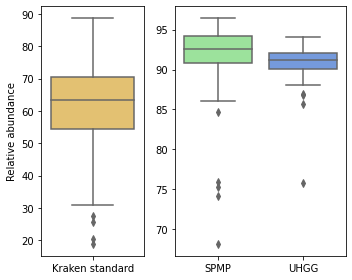

In [4]:
left = df[df["Database"].isin(("SPMP", "UHGG"))].sort_values('Database')
right = df[df["Database"].isin(("Kraken standard",))]

sc = SContainer(None, 1, 5)

graph = sc.graph((0, slice(0, 2)), right)
graph.sns.boxplot(x="Database", y="Classified", palette=cpal[3:])
graph.ax.set_xlabel('')
graph.ax.set_ylabel('Relative abundance')

graph = sc.graph((0, slice(2, 5)), left)
graph.sns.boxplot(x="Database", y="Classified", palette=cpal)
graph.ax.set_xlabel('')
graph.ax.set_ylabel('')

sc.apply().ax.set_xlabel("")
sc.apply().apply_xticklabels(size=10, rotation=0)

sc.fig.set_size_inches(5, 4)
sc.tight_layout()
sc.save('../img/sf8.A.svg')

In [5]:
save_replace_excel_spmp(df, 'SFig 8.A')